# **Cluster Analysis on global development measurement dataset**

#EDA


##Data Loding

In [3]:
# loading the data
import pandas as pd
df = pd.read_excel('World_development_mesurement.xlsx')
df.head()

,Birth Rate,Business Tax Rate,CO2 Emissions,Country,Days to Start Business,Ease of Business,Energy Usage,GDP,Health Exp % GDP,Health Exp/Capita,...,Life Expectancy Male,Mobile Phone Usage,Number of Records,Population 0-14,Population 15-64,Population 65+,Population Total,Population Urban,Tourism Inbound,Tourism Outbound
0,0.020,NaN,87931.0,Algeria,NaN,NaN,26998.0,"$54,790,058,957",0.035,$60,...,67.0,0.0,1,0.342,0.619,0.039,31719449,0.599,"$102,000,000","$193,000,000"
1,0.050,NaN,9542.0,Angola,NaN,NaN,7499.0,"$9,129,594,819",0.034,$22,...,44.0,0.0,1,0.476,0.499,0.025,13924930,0.324,"$34,000,000","$146,000,000"
2,0.043,NaN,1617.0,Benin,NaN,NaN,1983.0,"$2,359,122,303",0.043,$15,...,53.0,0.0,1,0.454,0.517,0.029,6949366,0.383,"$77,000,000","$50,000,000"
3,0.027,NaN,4276.0,Botswana,NaN,NaN,1836.0,"$5,788,311,645",0.047,$152,...,49.0,0.1,1,0.383,0.587,0.029,1755375,0.532,"$227,000,000","$209,000,000"
4,0.046,NaN,1041.0,Burkina Faso,NaN,NaN,NaN,"$2,610,959,139",0.051,$12,...,49.0,0.0,1,0.468,0.505,0.028,11607944,0.178,"$23,000,000","$30,000,000"


In [4]:
# rows & columns
display(df.shape)
# information of data
display(df.info())

(2704, 25)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2704 entries, 0 to 2703
Data columns (total 25 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Birth Rate              2585 non-null   float64
 1   Business Tax Rate       1423 non-null   object 
 2   CO2 Emissions           2125 non-null   float64
 3   Country                 2704 non-null   object 
 4   Days to Start Business  1718 non-null   float64
 5   Ease of Business        185 non-null    float64
 6   Energy Usage            1785 non-null   float64
 7   GDP                     2494 non-null   object 
 8   Health Exp % GDP        2395 non-null   float64
 9   Health Exp/Capita       2395 non-null   object 
 10  Hours to do Tax         1416 non-null   float64
 11  Infant Mortality Rate   2444 non-null   float64
 12  Internet Usage          2531 non-null   float64
 13  Lending Interest        1880 non-null   float64
 14  Life Expectancy Female  2568 non-null   

None

## Checking Null Values


In [5]:
# checking the missing values
display(df.isnull().sum())
## percentage of missing values
missing_percentage = df.isnull().mean()*100
display(missing_percentage)

,0
Birth Rate,119
Business Tax Rate,1281
CO2 Emissions,579
Country,0
Days to Start Business,986
Ease of Business,2519
Energy Usage,919
GDP,210
Health Exp % GDP,309
Health Exp/Capita,309


,0
Birth Rate,4.400888
Business Tax Rate,47.374260
CO2 Emissions,21.412722
Country,0.000000
Days to Start Business,36.464497
Ease of Business,93.158284
Energy Usage,33.986686
GDP,7.766272
Health Exp % GDP,11.427515
Health Exp/Capita,11.427515


In [6]:
## fixing the data types
# Clean and convert columns with '$' and ',' to numeric
cols_to_convert = ['Business Tax Rate', 'GDP', 'Health Exp/Capita', 'Tourism Inbound', 'Tourism Outbound']
for col in cols_to_convert:
    df[col] = df[col].astype(str).str.replace('$', '').str.replace(',', '')
    df[col] = pd.to_numeric(df[col], errors='coerce')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2704 entries, 0 to 2703
Data columns (total 25 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Birth Rate              2585 non-null   float64
 1   Business Tax Rate       0 non-null      float64
 2   CO2 Emissions           2125 non-null   float64
 3   Country                 2704 non-null   object 
 4   Days to Start Business  1718 non-null   float64
 5   Ease of Business        185 non-null    float64
 6   Energy Usage            1785 non-null   float64
 7   GDP                     2494 non-null   float64
 8   Health Exp % GDP        2395 non-null   float64
 9   Health Exp/Capita       2395 non-null   float64
 10  Hours to do Tax         1416 non-null   float64
 11  Infant Mortality Rate   2444 non-null   float64
 12  Internet Usage          2531 non-null   float64
 13  Lending Interest        1880 non-null   float64
 14  Life Expectancy Female  2568 non-null   

In [7]:
# Drop columns with >50% missing values
threshold = 45
cols_to_drop = missing_percentage[missing_percentage > threshold].index.tolist()
df = df.drop(columns=cols_to_drop)

# Impute missing values in remaining numeric columns (using median for robustness)
numeric_columns = df.select_dtypes(include=['number']).columns.tolist()
for col in numeric_columns:
    if df[col].isnull().any():
        df[col] = df[col].fillna(df[col].median())

# Final check
print("Remaining null values:\n", df.isnull().sum())


Remaining null values:
 Birth Rate                0
CO2 Emissions             0
Country                   0
Days to Start Business    0
Energy Usage              0
GDP                       0
Health Exp % GDP          0
Health Exp/Capita         0
Infant Mortality Rate     0
Internet Usage            0
Lending Interest          0
Life Expectancy Female    0
Life Expectancy Male      0
Mobile Phone Usage        0
Number of Records         0
Population 0-14           0
Population 15-64          0
Population 65+            0
Population Total          0
Population Urban          0
Tourism Inbound           0
Tourism Outbound          0
dtype: int64


In [8]:
# handling the duplicates
display(df.duplicated().sum())

np.int64(0)

In [9]:
# summary statistics of data
display(df.describe())

,Birth Rate,CO2 Emissions,Days to Start Business,Energy Usage,GDP,Health Exp % GDP,Health Exp/Capita,Infant Mortality Rate,Internet Usage,Lending Interest,...,Life Expectancy Male,Mobile Phone Usage,Number of Records,Population 0-14,Population 15-64,Population 65+,Population Total,Population Urban,Tourism Inbound,Tourism Outbound
count,2704.000000,2.704000e+03,2704.000000,2.704000e+03,2.704000e+03,2704.000000,2704.000000,2704.000000,2704.000000,2704.000000,...,2704.000000,2704.000000,2704.0,2704.000000,2704.000000,2704.000000,2.704000e+03,2704.000000,2.704000e+03,2.704000e+03
mean,0.022595,1.136616e+05,34.894601,5.585961e+04,2.445336e+11,0.063807,731.872411,0.031581,0.230806,0.139539,...,66.589497,0.573299,1.0,0.302762,0.625029,0.071718,3.145729e+07,0.562924,4.360806e+09,3.985061e+09
std,0.011100,5.487421e+05,46.177780,2.132565e+05,1.087172e+12,0.024795,1400.121122,0.028739,0.253983,0.143847,...,9.167741,0.460136,0.0,0.102152,0.066967,0.047844,1.242894e+08,0.244712,1.295591e+10,1.216499e+10
min,0.007000,7.000000e+00,1.000000,8.000000e+00,6.310127e+07,0.008000,2.000000,0.002000,0.000000,0.005000,...,37.000000,0.000000,1.0,0.118000,0.474000,0.003000,1.887600e+04,0.082000,7.000000e+05,2.000000e+05
25%,0.013000,2.237000e+03,20.000000,7.851750e+03,4.113748e+09,0.048000,58.000000,0.010000,0.000000,0.097750,...,61.000000,0.200000,1.0,0.210000,0.565000,0.034000,8.783360e+05,0.357750,1.860000e+08,1.470000e+08
50%,0.020000,8.529000e+03,26.000000,1.433800e+04,1.507975e+10,0.061000,193.000000,0.020000,0.100000,0.120000,...,69.000000,0.500000,1.0,0.299500,0.642500,0.052000,5.800324e+06,0.560000,6.885000e+08,4.560000e+08
75%,0.030000,4.256200e+04,34.250000,2.347650e+04,9.101825e+10,0.076000,551.250000,0.049000,0.400000,0.149250,...,73.000000,0.900000,1.0,0.395000,0.673000,0.105000,2.014089e+07,0.763000,2.648000e+09,1.711500e+09
max,0.053000,8.286892e+06,694.000000,2.727728e+06,1.624460e+13,0.225000,9908.000000,0.141000,1.000000,4.965000,...,88.000000,2.900000,1.0,0.500000,0.858000,0.244000,1.350695e+09,1.000000,2.000920e+11,1.265730e+11


## Data Visualizations

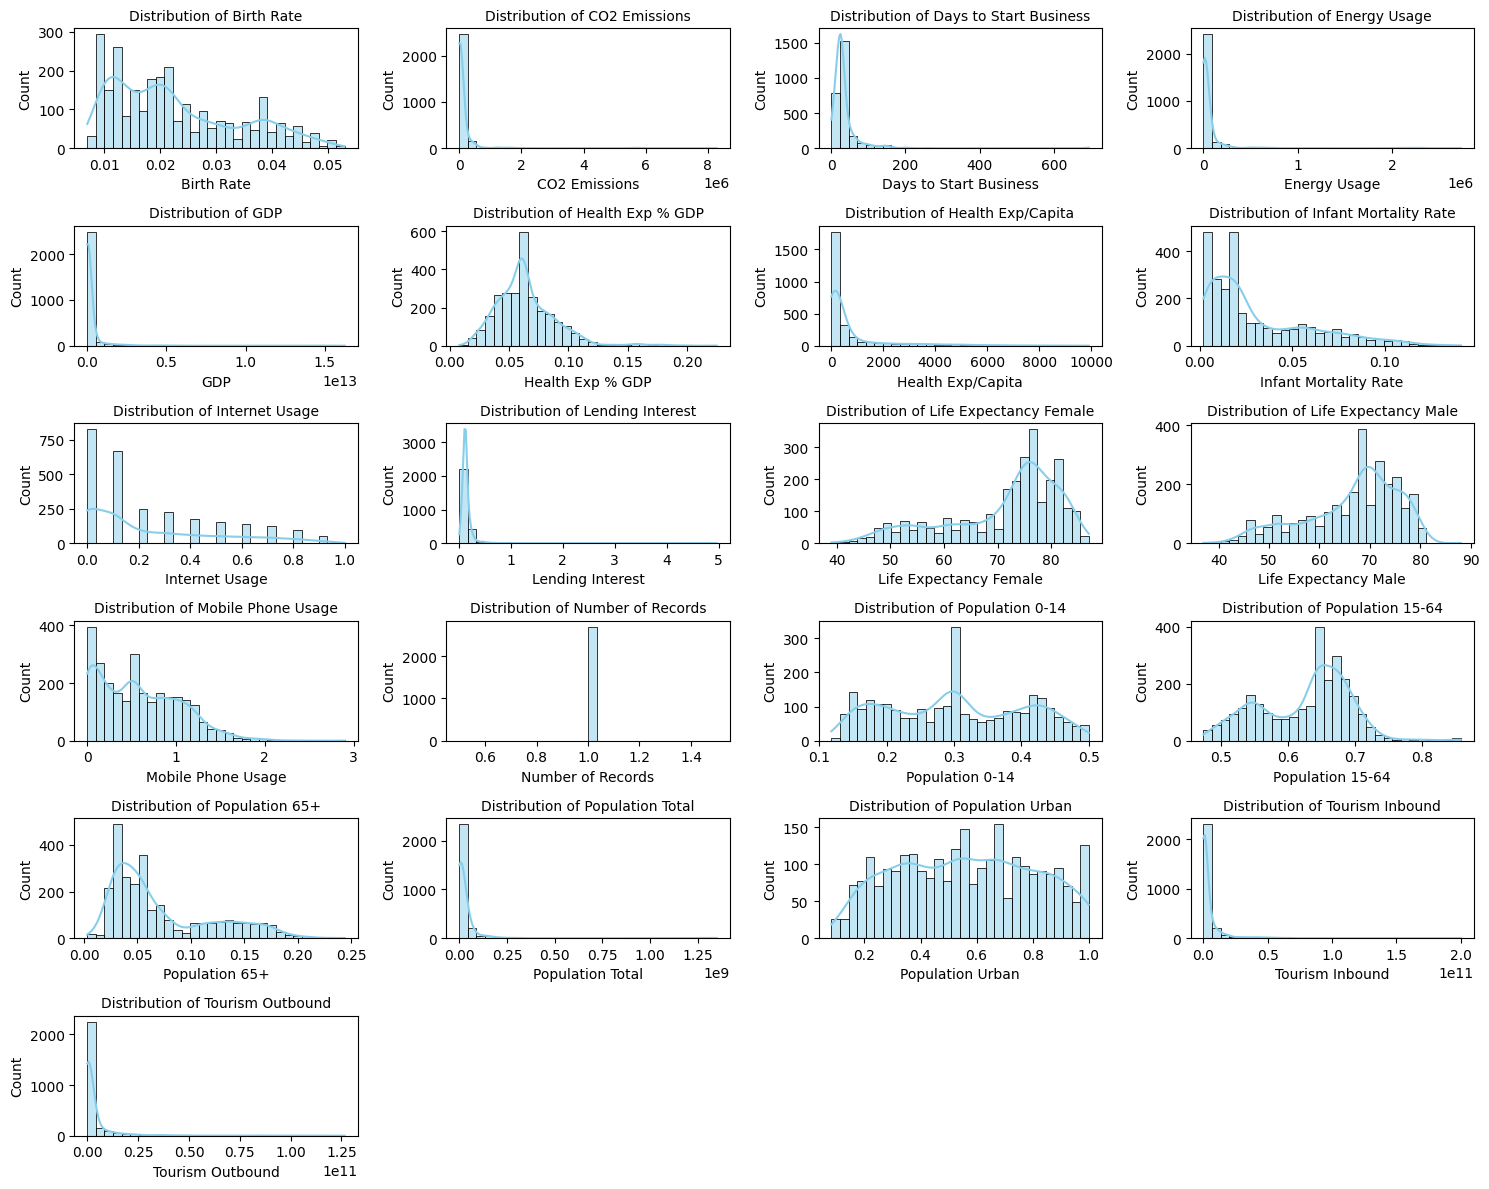

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

# Select only numeric columns
num_cols = df.select_dtypes(include=['number']).columns

# Plot histograms with KDE for all numeric variables
plt.figure(figsize=(15, 12)) # Reduced figure size
for i, col in enumerate(num_cols, 1):
    plt.subplot(6, 4, i)  # Using a fixed grid size (adjust as needed)
    sns.histplot(df[col], kde=True, bins=30, color='skyblue')
    plt.title(f'Distribution of {col}', fontsize=10) # Reduced title font size
plt.tight_layout()
plt.show()

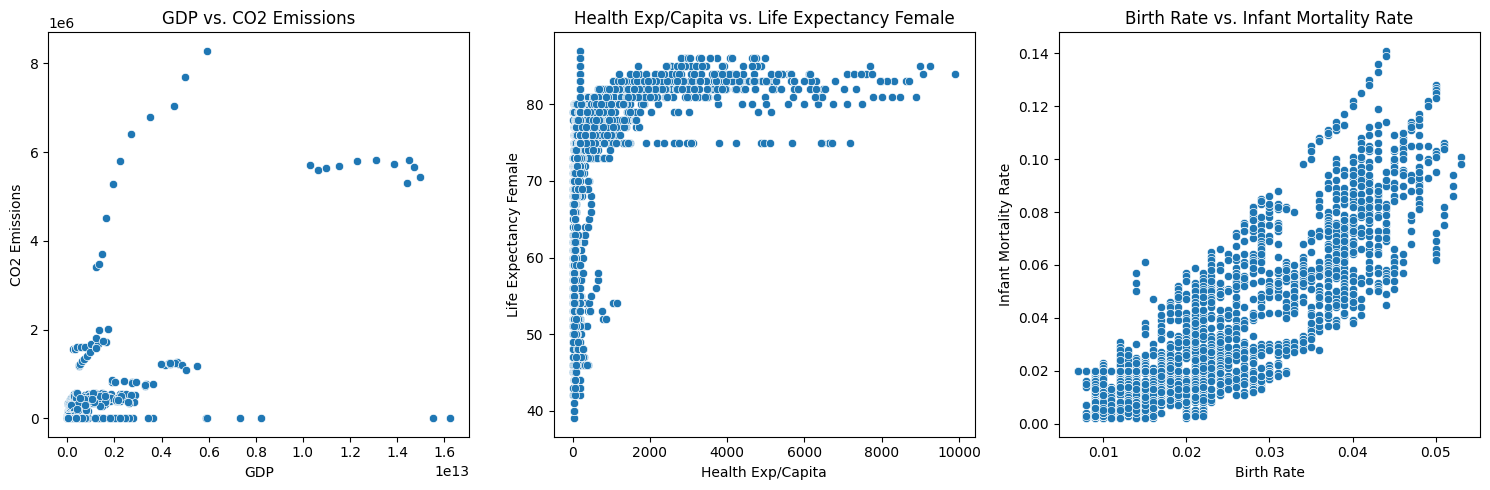

In [11]:
# Create scatter plots for selected numerical variables
plt.figure(figsize=(15, 5))

# Scatter plot of GDP vs. CO2 Emissions
plt.subplot(1, 3, 1)
sns.scatterplot(x='GDP', y='CO2 Emissions', data=df)
plt.title('GDP vs. CO2 Emissions')

# Scatter plot of Life Expectancy Female vs. Health Exp/Capita
plt.subplot(1, 3, 2)
sns.scatterplot(x='Health Exp/Capita', y='Life Expectancy Female', data=df)
plt.title('Health Exp/Capita vs. Life Expectancy Female')

# Scatter plot of Birth Rate vs. Infant Mortality Rate
plt.subplot(1, 3, 3)
sns.scatterplot(x='Birth Rate', y='Infant Mortality Rate', data=df)
plt.title('Birth Rate vs. Infant Mortality Rate')

plt.tight_layout()
plt.show()

* GDP vs CO₂ Emissions: Richer countries usually produce more CO₂.

* Health Spending vs Female Life Expectancy: More spending on healthcare is linked to women living longer.

* Birth Rate vs Infant Mortality: Countries with more births often also have more baby deaths.

## Handling Outliers using Boxplot

Before handling the outliers


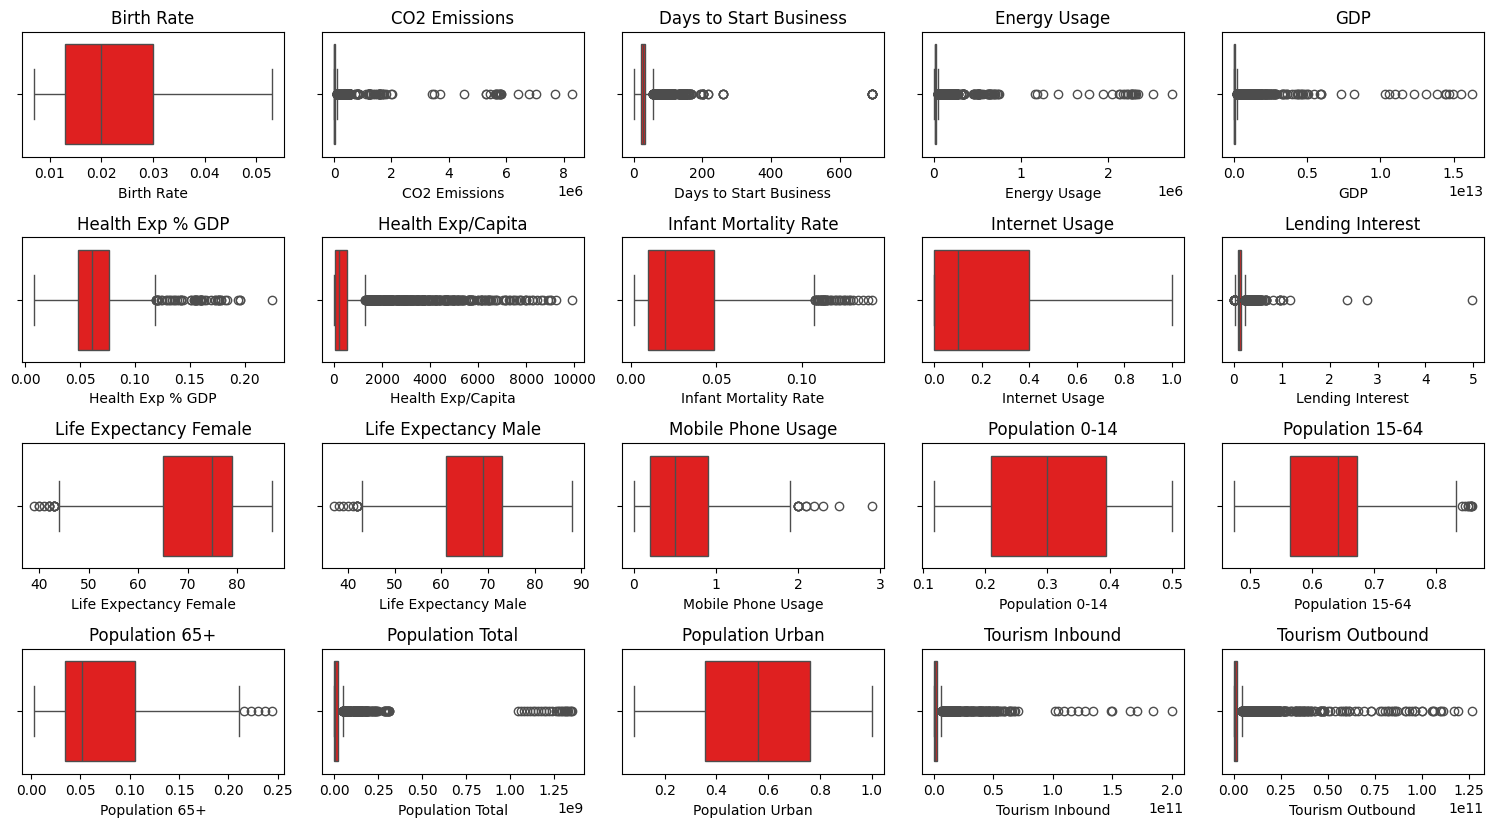

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

# Remove columns that are not suitable for outlier detection using IQR (e.g., IDs, binary flags)
# Based on df.head(), df.info(), and df.describe(), 'Number of Records' and 'Business Tax Rate' seem unsuitable.
cols_to_exclude = ['Number of Records', 'Business Tax Rate', 'Ease of Business']
num_cols_outliers = [col for col in numeric_columns if col not in cols_to_exclude]

print("Before handling the outliers")
# Create boxplots for the numerical columns
plt.figure(figsize=(15, 10))
for i, col in enumerate(num_cols_outliers):
    plt.subplot(5, 5, i + 1)
    sns.boxplot(x=df[col],color='red')
    plt.title(col)

plt.tight_layout()
plt.show()

In [13]:
## detecting outliers
import numpy as np

outlier_counts = {}
outlier_summary = []

for col in num_cols_outliers:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1

    # Define bounds for outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Identify outliers
    num_upper = (df[col] > upper_bound).sum() # Count of upper outliers
    num_lower = (df[col] < lower_bound).sum() # Count of lower outliers

    # outliers counts
    outlier_counts[col] = {
        "Upper Outliers": num_upper,
        "Lower Outliers": num_lower
    }

    # cap the outliers
    df[col] = np.where(df[col] < lower_bound, lower_bound,
           np.where(df[col] > upper_bound, upper_bound, df[col]))

     # Collect summary
    # This will help in understanding the spread of the data and identifying outliers
    outlier_summary.append({
        "Column": col,
        "Quartile 1": Q1,
        "Quartile 3": Q3,
        "IQR": IQR,
        "Lower Whisker": lower_bound,
        "Upper Whisker": upper_bound,
        "Upper Outliers": num_upper,
        "Lower Outliers": num_lower
    })

# displaying the summary table in df
outlier_df = pd.DataFrame(outlier_summary)
display(outlier_df)


,Column,Quartile 1,Quartile 3,IQR,Lower Whisker,Upper Whisker,Upper Outliers,Lower Outliers
0,Birth Rate,1.300000e-02,3.000000e-02,1.700000e-02,-1.250000e-02,5.550000e-02,0,0
1,CO2 Emissions,2.237000e+03,4.256200e+04,4.032500e+04,-5.825050e+04,1.030495e+05,387,0
2,Days to Start Business,2.000000e+01,3.425000e+01,1.425000e+01,-1.375000e+00,5.562500e+01,340,0
3,Energy Usage,7.851750e+03,2.347650e+04,1.562475e+04,-1.558538e+04,4.691362e+04,424,0
4,GDP,4.113748e+09,9.101825e+10,8.690451e+10,-1.262430e+11,2.213750e+11,414,0
5,Health Exp % GDP,4.800000e-02,7.600000e-02,2.800000e-02,6.000000e-03,1.180000e-01,58,0
6,Health Exp/Capita,5.800000e+01,5.512500e+02,4.932500e+02,-6.818750e+02,1.291125e+03,412,0
7,Infant Mortality Rate,1.000000e-02,4.900000e-02,3.900000e-02,-4.850000e-02,1.075000e-01,49,0
8,Internet Usage,0.000000e+00,4.000000e-01,4.000000e-01,-6.000000e-01,1.000000e+00,0,0
9,Lending Interest,9.775000e-02,1.492500e-01,5.150000e-02,2.050000e-02,2.265000e-01,225,20


After handling the outliers


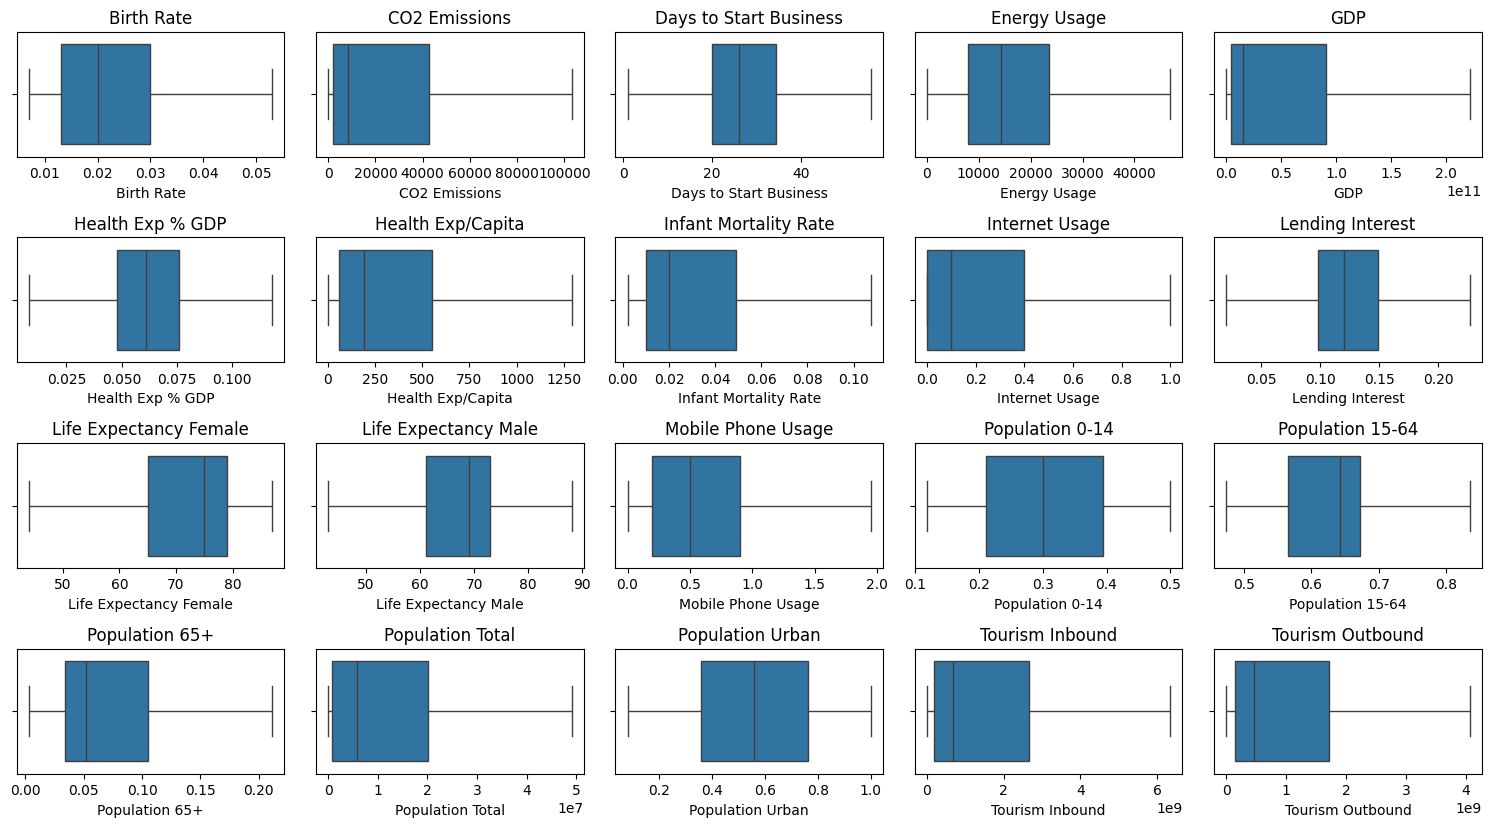

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

print("After handling the outliers")
# Create boxplots for the numerical columns
plt.figure(figsize=(15, 10))
for i, col in enumerate(num_cols_outliers):
    plt.subplot(5, 5, i + 1)
    sns.boxplot(x=df[col])
    plt.title(col)

plt.tight_layout()
plt.show()

## Correlation

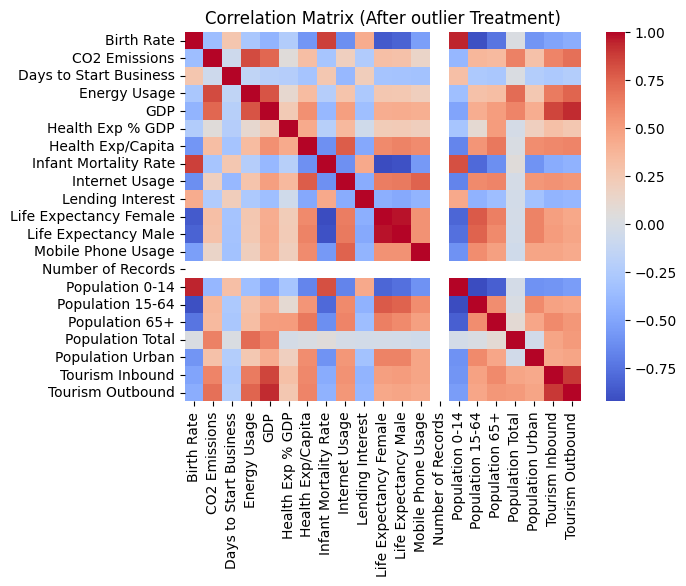

In [15]:
# Correlation matrix (heatmap) fro numeric columns
import seaborn as sns, matplotlib.pyplot as plt

# Select only numerical columns for correlation calculation
df_numeric = df.select_dtypes(include='number')

sns.heatmap(df_numeric.corr(), annot=False, cmap="coolwarm")
plt.title("Correlation Matrix (After outlier Treatment)")
plt.show()

Strong positive correlation between:
 * GDP and CO₂ emissions (wealthier nations emit more CO₂).
 * Health Expenditure per capita and Female Life Expectancy.

Negative correlation between:
  * Birth Rate and Infant Mortality.
  * Correlation heatmap after outlier treatment is more reliable.


In [16]:
df.head()

,Birth Rate,CO2 Emissions,Country,Days to Start Business,Energy Usage,GDP,Health Exp % GDP,Health Exp/Capita,Infant Mortality Rate,Internet Usage,...,Life Expectancy Male,Mobile Phone Usage,Number of Records,Population 0-14,Population 15-64,Population 65+,Population Total,Population Urban,Tourism Inbound,Tourism Outbound
0,0.020,87931.0,Algeria,26.0,26998.0,5.479006e+10,0.035,60.0,0.0340,0.0,...,67.0,0.0,1,0.342,0.619,0.039,31719449.0,0.599,102000000.0,193000000.0
1,0.050,9542.0,Angola,26.0,7499.0,9.129595e+09,0.034,22.0,0.1075,0.0,...,44.0,0.0,1,0.476,0.499,0.025,13924930.0,0.324,34000000.0,146000000.0
2,0.043,1617.0,Benin,26.0,1983.0,2.359122e+09,0.043,15.0,0.0900,0.0,...,53.0,0.0,1,0.454,0.517,0.029,6949366.0,0.383,77000000.0,50000000.0
3,0.027,4276.0,Botswana,26.0,1836.0,5.788312e+09,0.047,152.0,0.0540,0.0,...,49.0,0.1,1,0.383,0.587,0.029,1755375.0,0.532,227000000.0,209000000.0
4,0.046,1041.0,Burkina Faso,26.0,14338.0,2.610959e+09,0.051,12.0,0.0960,0.0,...,49.0,0.0,1,0.468,0.505,0.028,11607944.0,0.178,23000000.0,30000000.0


# Model Building

In [17]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import numpy as np

In [18]:
# x: Numeric Dataframe Values
x = df.select_dtypes(include = 'number')

# Standadizing the data
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

In [19]:
# perfoming PCA
pca = PCA()
x_pca = pca.fit_transform(x_scaled)

## KMeans Clustering (partition based)

In [20]:
# performing KMeans Clustering
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

best_k, best_score = None, -1
for k in range(2,15):
    kmeans = KMeans(n_clusters = k, random_state = 42)
    kmeans_labels = kmeans.fit_predict(x_pca)
    score = silhouette_score(x_pca, kmeans_labels)
    if score > best_score:
        best_score = score
        best_k = k
print(f"Best K: {best_k}, Best Score: {best_score}")

Best K: 3, Best Score: 0.2860503875958302


* score (0.286) means the clusters exist but overlap → not super strong, but not random either

In [21]:
# fitting the model
kmeans = KMeans(n_clusters = 3, random_state = 42)
df['kmeans_cluster'] = kmeans_labels

In [22]:
# analyze the cluster charecterstics
cluster_summary = df.groupby('kmeans_cluster').mean(numeric_only = True)
display(cluster_summary)

,Birth Rate,CO2 Emissions,Days to Start Business,Energy Usage,GDP,Health Exp % GDP,Health Exp/Capita,Infant Mortality Rate,Internet Usage,Lending Interest,...,Life Expectancy Male,Mobile Phone Usage,Number of Records,Population 0-14,Population 15-64,Population 65+,Population Total,Population Urban,Tourism Inbound,Tourism Outbound
kmeans_cluster,,,,,,,,,,,,,,,,,,,,,
0,0.019007,12530.528571,30.524107,6263.407143,1.525601e+10,0.062643,148.764286,0.024979,0.087857,0.210611,...,67.757143,0.302857,1.0,0.284843,0.643800,0.071393,6.750799e+06,0.558914,6.867293e+08,3.085357e+08
1,0.011475,19277.852459,30.261612,10895.284153,2.463640e+10,0.076869,414.862022,0.011005,0.239344,0.115148,...,71.256831,0.585792,1.0,0.190623,0.679175,0.130186,4.499880e+06,0.676852,1.454579e+09,7.029891e+08
2,0.033180,4545.980000,49.420000,7911.710000,7.352088e+09,0.064760,168.310000,0.068310,0.032000,0.129660,...,50.270000,0.352000,1.0,0.400880,0.565920,0.033170,6.688255e+06,0.405290,2.544030e+08,2.419160e+08
3,0.017982,88366.566210,30.509703,44158.622146,1.975488e+11,0.053397,331.197489,0.021082,0.219635,0.120699,...,68.264840,0.679909,1.0,0.262959,0.669991,0.066795,4.257021e+07,0.626781,5.071203e+09,3.595823e+09
4,0.011079,102044.700658,20.814967,45860.348684,2.162560e+11,0.090849,1230.341283,0.004704,0.552632,0.069743,...,76.526316,0.896053,1.0,0.168086,0.675612,0.156155,3.590698e+07,0.792079,6.300230e+09,3.970423e+09
5,0.016517,7527.636364,19.567584,11461.313995,1.544214e+10,0.057885,371.942584,0.016402,0.436842,0.113990,...,71.492823,1.154067,1.0,0.257522,0.668804,0.072234,2.369386e+06,0.492761,9.677679e+08,3.761483e+08
6,0.018089,14675.317778,28.120000,13927.306667,2.462241e+10,0.052364,555.133333,0.014191,0.304000,0.101324,...,71.924444,0.636444,1.0,0.288764,0.657764,0.050698,2.247195e+06,0.877818,9.002289e+08,6.926278e+08
7,0.037456,4892.218391,22.735632,11152.973180,1.006097e+10,0.056180,39.670498,0.061483,0.031034,0.151898,...,57.509579,0.265134,1.0,0.434460,0.534594,0.030923,1.447308e+07,0.354050,3.747923e+08,2.618207e+08
8,0.022833,7273.194969,28.840016,10265.672956,8.496976e+09,0.063462,203.877358,0.023406,0.100000,0.120022,...,68.814465,0.376730,1.0,0.335657,0.612399,0.050726,3.428935e+06,0.454434,4.736950e+08,2.771531e+08


**Visualization**

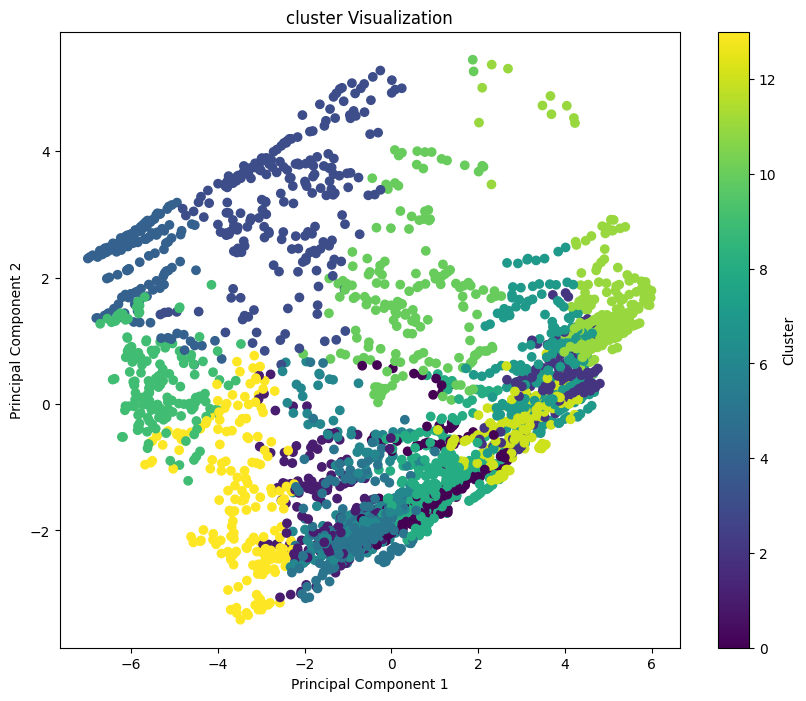

In [23]:
# Pca Sactterplot
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
plt.scatter(x_pca[:, 0], x_pca[:, 1], c=kmeans_labels, cmap='viridis')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('cluster Visualization')
plt.colorbar(label='Cluster')
plt.show()

In [24]:
# performing cluster validation
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score

# Silhouette Score
silhouette = silhouette_score(x_pca, kmeans_labels)
print(f"Silhouette Score: {silhouette}")

# Calinski-Harabasz Index
calinski_harabasz = calinski_harabasz_score(x_pca, kmeans_labels)
print(f"Calinski-Harabasz Index: {calinski_harabasz}")

# Davies-Bouldin Index
davies_bouldin = davies_bouldin_score(x_pca, kmeans_labels)
print(f"Davies-Bouldin Index: {davies_bouldin}")


Silhouette Score: 0.1429019537384439
Calinski-Harabasz Index: 513.0744214315968
Davies-Bouldin Index: 1.8195523824417352


## DBSCAN Clustering (Density Based)

In [25]:
from sklearn.cluster import DBSCAN
import numpy as np
from sklearn.metrics import silhouette_score

# Perform DBSCAN
# tune DBSCAN parameters
best_score,best_params = -1, {}
for eps in np.arange(0.1,2.0,0.1):
    for min_samples in range(2,10):
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        dbscan_labels = dbscan.fit_predict(x_pca)

        # Filter out noise points (-1) and corresponding data points
        filtered_indices = dbscan_labels != -1
        dbscan_labels_filtered = dbscan_labels[filtered_indices]
        x_pca_filtered = x_pca[filtered_indices]

        unique_labels = np.unique(dbscan_labels_filtered)
        if len(unique_labels) > 1: # Silhouette score requires at least 2 clusters
            score = silhouette_score(x_pca_filtered, dbscan_labels_filtered)
            if score > best_score:
                best_score = score
                best_params = {'eps': eps, 'min_samples': min_samples}
print(f"Best Score: {best_score}, Best Params: {best_params}")

# Fit DBSCAN with best parameters and add labels to DataFrame
best_dbscan = DBSCAN(eps=best_params['eps'], min_samples=best_params['min_samples'])
df['dbscan_cluster'] = best_dbscan.fit_predict(x_pca)

Best Score: 0.8881507075596277, Best Params: {'eps': np.float64(0.1), 'min_samples': 8}


In [26]:
# analyzing the cluster charecterstics
dbscan_summary = df.groupby('dbscan_cluster').mean(numeric_only = True)
display(dbscan_summary)

,Birth Rate,CO2 Emissions,Days to Start Business,Energy Usage,GDP,Health Exp % GDP,Health Exp/Capita,Infant Mortality Rate,Internet Usage,Lending Interest,...,Mobile Phone Usage,Number of Records,Population 0-14,Population 15-64,Population 65+,Population Total,Population Urban,Tourism Inbound,Tourism Outbound,kmeans_cluster
dbscan_cluster,,,,,,,,,,,,,,,,,,,,,
-1,0.022613,27451.610759,28.154319,18294.4207,5.998143e+10,0.063044,394.601452,0.031481,0.231683,0.125905,...,0.572803,1.0,0.302784,0.624851,0.071816,1.366178e+07,0.560338,1.833575e+09,1.197559e+09,6.782949
0,0.020000,8529.000000,26.000000,14338.0000,1.507975e+10,0.061000,193.000000,0.020000,0.100000,0.120000,...,0.500000,1.0,0.299500,0.642500,0.052000,3.540150e+04,1.000000,6.222000e+08,1.145000e+08,6.000000
1,0.020000,138.500000,26.000000,14338.0000,1.507975e+10,0.061000,193.000000,0.020000,0.100000,0.120000,...,0.500000,1.0,0.299500,0.642500,0.052000,2.773600e+04,0.884875,6.885000e+08,4.560000e+08,6.000000


In [27]:
# data validation for DBSCAN
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score

# Silhouette Score
silhouette = silhouette_score(x_pca_filtered, dbscan_labels_filtered)
print(f"Silhouette Score: {silhouette}")

# calinski harabasz score
calinski_harabasz = calinski_harabasz_score(x_pca_filtered, dbscan_labels_filtered)
print(f"Calinski-Harabasz Index: {calinski_harabasz}")

#davies bouldin score
davies_bouldin = davies_bouldin_score(x_pca_filtered, dbscan_labels_filtered)
print(f"Davies-Bouldin Index: {davies_bouldin}")

Silhouette Score: -0.09976561004887666
Calinski-Harabasz Index: 85.07643148888243
Davies-Bouldin Index: 1.1826056586058609


Visuvalizing DBSCAN Cluster

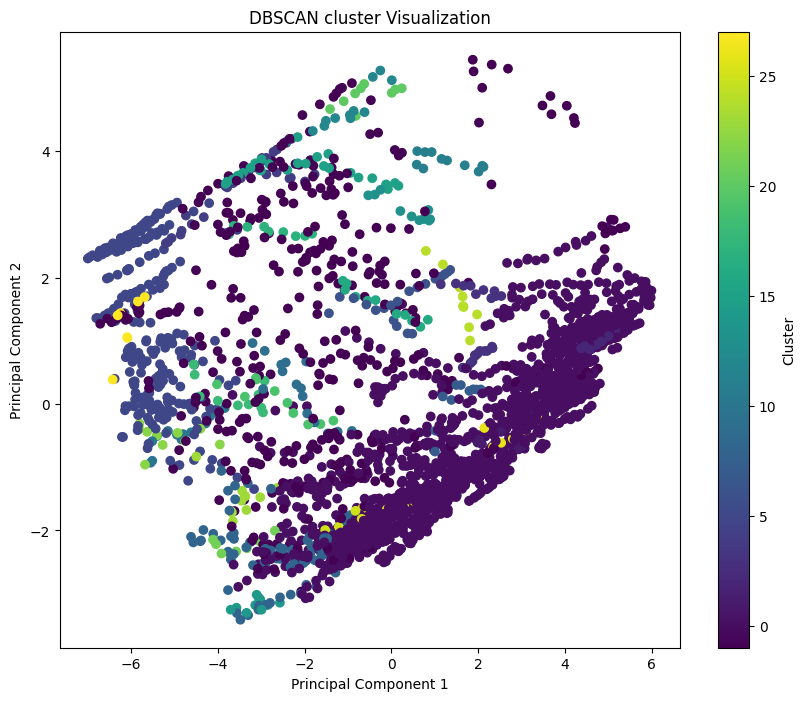

In [28]:
# visulizing the clusters using sccater plot
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
plt.scatter(x_pca[:, 0], x_pca[:, 1], c=dbscan_labels, cmap='viridis')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('DBSCAN cluster Visualization')
plt.colorbar(label='Cluster')
plt.show()

## Hierarchical /Agglomerative Clustering

In [29]:
# performing Hirarchical / Agglomerative clustering
from sklearn.cluster import AgglomerativeClustering

# fitting Agglomerative clustering on PCA-reduced data

for k in range(2,10):
    agg = AgglomerativeClustering(n_clusters = k)
    agg_labels = agg.fit_predict(x_pca)
    score = silhouette_score(x_pca, agg_labels)
    if score > best_score:
        best_score = score
        best_k = k
print(f"Best K: {best_k}, Best Score: {best_score}")
df['agg_cluster'] = agg_labels

Best K: 3, Best Score: 0.8881507075596277


In [30]:
# analyzing the cluster charecterstics
agg_summary = df.groupby('agg_cluster').mean(numeric_only = True)
display(agg_summary)

,Birth Rate,CO2 Emissions,Days to Start Business,Energy Usage,GDP,Health Exp % GDP,Health Exp/Capita,Infant Mortality Rate,Internet Usage,Lending Interest,...,Number of Records,Population 0-14,Population 15-64,Population 65+,Population Total,Population Urban,Tourism Inbound,Tourism Outbound,kmeans_cluster,dbscan_cluster
agg_cluster,,,,,,,,,,,,,,,,,,,,,
0,0.017418,13394.671460,23.529591,12454.510232,2.055411e+10,0.055425,530.555033,0.014978,0.371018,0.106205,...,1.0,0.273096,0.665784,0.058856,2.095831e+06,0.711604,1.141610e+09,6.645868e+08,5.951327,-0.942478
1,0.011668,69061.908946,18.134585,37199.083067,2.058215e+11,0.092754,1261.237620,0.004278,0.608946,0.077530,...,1.0,0.175665,0.668952,0.155110,2.312955e+07,0.783821,5.904744e+09,3.878101e+09,6.894569,-1.000000
2,0.034889,3954.762048,40.698042,7446.963855,6.651213e+09,0.053099,85.222892,0.061036,0.031928,0.152848,...,1.0,0.415145,0.551852,0.032982,6.875503e+06,0.411380,2.675117e+08,2.293262e+08,7.126506,-1.000000
3,0.022342,5973.766537,31.494893,8407.163424,8.580774e+09,0.064761,191.356031,0.026383,0.097471,0.143802,...,1.0,0.324275,0.617641,0.057370,4.158770e+06,0.449889,4.474817e+08,2.479914e+08,6.229572,-1.000000
4,0.016844,99257.753555,31.506517,44852.949052,1.792952e+11,0.056493,314.199052,0.020147,0.180095,0.129073,...,1.0,0.252886,0.666611,0.080502,3.889021e+07,0.654280,4.410860e+09,3.216435e+09,4.123223,-1.000000
5,0.022742,61485.250000,30.377577,27569.371778,6.663013e+10,0.042351,99.685567,0.035665,0.073196,0.132129,...,1.0,0.323649,0.626557,0.049845,3.207105e+07,0.513464,1.289814e+09,8.603157e+08,8.355670,-1.000000
6,0.014606,24737.069149,19.853723,28179.547872,1.829751e+11,0.052553,568.154255,0.014585,0.481915,0.089915,...,1.0,0.207489,0.715287,0.076043,2.508832e+07,0.781713,5.267314e+09,3.381944e+09,8.021277,-1.000000
7,0.011412,16186.303502,23.481518,10275.521401,2.983135e+10,0.073416,570.508755,0.009770,0.388327,0.108358,...,1.0,0.183743,0.681179,0.135121,3.346923e+06,0.702276,1.788805e+09,8.843580e+08,5.498054,-1.000000
8,0.042237,7152.728487,28.595697,15514.408012,1.610211e+10,0.063766,48.908012,0.082883,0.023145,0.160955,...,1.0,0.453614,0.517537,0.028822,1.911837e+07,0.284018,3.499528e+08,3.348442e+08,9.652819,-1.000000


In [31]:
# Data Validation for Hierarchical
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score

# Silhouette Score
silhouette = silhouette_score(x_pca, agg_labels)
print(f"Silhouette Score: {silhouette}")

# calinski harabasz score
ch_score = calinski_harabasz_score(x_pca, agg_labels)
print(f"Calinski-Harabasz Index: {ch_score}")

#davies bouldin score
db_score = davies_bouldin_score(x_pca, agg_labels)
print(f"Davies-Bouldin Index: {db_score}")

Silhouette Score: 0.1343066935037668
Calinski-Harabasz Index: 619.9850643307549
Davies-Bouldin Index: 2.0190236309214074


Visuvalization

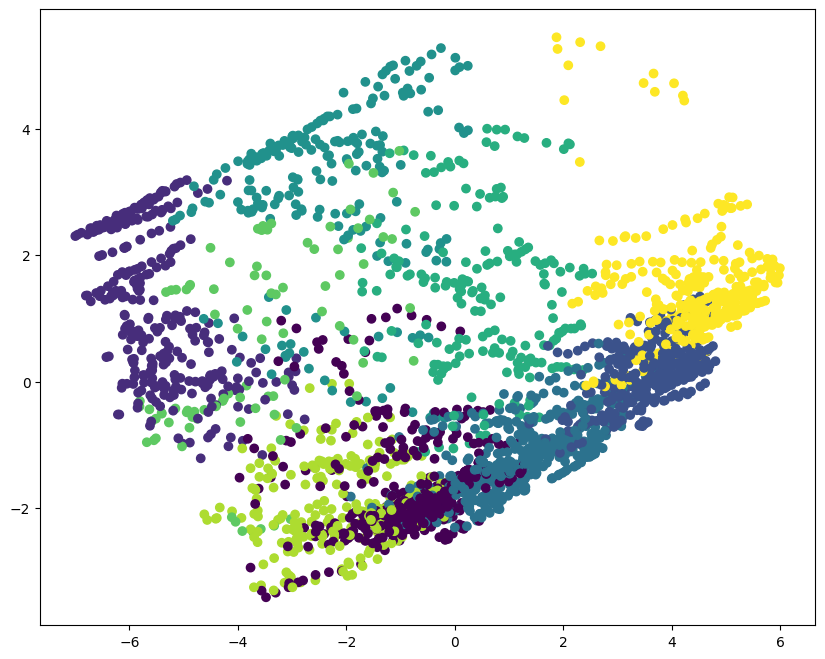

In [32]:
# visuvalizing the agglomerative cluster using scater plot
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
plt.scatter(x_pca[:, 0], x_pca[:, 1], c=agg_labels, cmap='viridis')

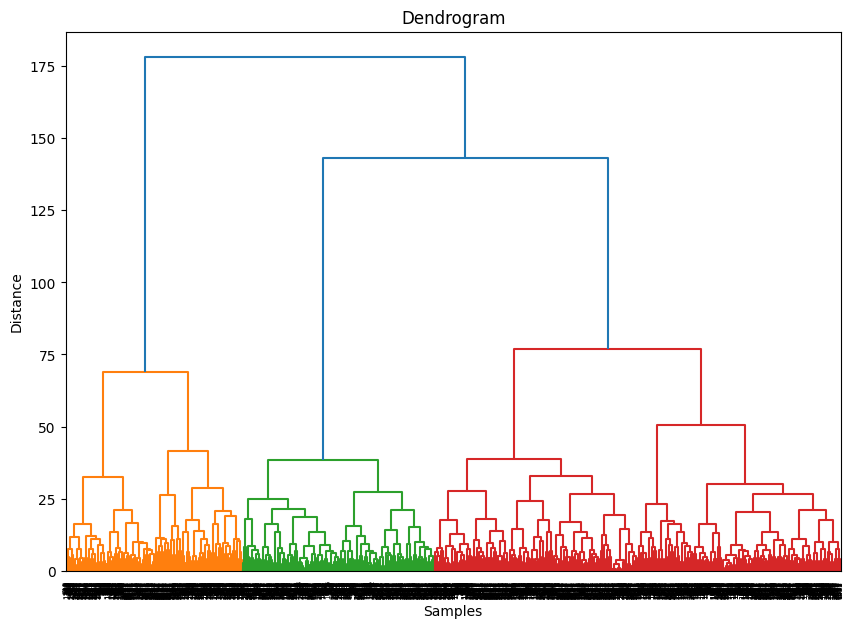

In [33]:
# visuvalizing the hierarchical using dendrogram

from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt

# Perform hierarchical clustering
linkage_matrix = linkage(x_pca, method='ward') # Calculate the linkage matrix
plt.figure(figsize=(10, 7))
dendrogram(linkage_matrix)
plt.title('Dendrogram')
plt.xlabel('Samples')
plt.ylabel('Distance')
plt.show()

## Gaussian Mixture Model (Model-Based)

In [34]:
# performing gaussian mixture model
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score

gmm = GaussianMixture(n_components=3, random_state=42)
gmm_labels = gmm.fit_predict(x_pca)
df['GMM_cluster'] = gmm_labels

# silhouette score
silhouette = silhouette_score(x_pca, gmm_labels)
print(f"Silhouette Score: {silhouette}")

# calinski harabasz score
ch_score = calinski_harabasz_score(x_pca, gmm_labels)
print(f"Calinski-Harabasz Index: {ch_score}")

#davies bouldin
db_score = davies_bouldin_score(x_pca, gmm_labels)
print(f"Davies-Bouldin Index: {db_score}")


Silhouette Score: 0.1824002686523159
Calinski-Harabasz Index: 903.7635026293541
Davies-Bouldin Index: 1.6690672725012987


In [35]:
#summarizing the gmm_labels
gmm_summary = df.groupby('GMM_cluster').mean(numeric_only = True)
display(gmm_summary)

,Birth Rate,CO2 Emissions,Days to Start Business,Energy Usage,GDP,Health Exp % GDP,Health Exp/Capita,Infant Mortality Rate,Internet Usage,Lending Interest,...,Population 0-14,Population 15-64,Population 65+,Population Total,Population Urban,Tourism Inbound,Tourism Outbound,kmeans_cluster,dbscan_cluster,agg_cluster
GMM_cluster,,,,,,,,,,,,,,,,,,,,,
0,0.015916,5967.906158,25.690616,9770.196481,9.390904e+09,0.064016,441.491569,0.015067,0.315836,0.117168,...,0.257933,0.659773,0.080364,9.571410e+05,0.648891,8.036834e+08,3.450796e+08,5.409091,-0.961877,2.451613
1,0.016838,59213.255824,25.208557,30217.956989,1.330497e+11,0.065400,622.270833,0.018258,0.337455,0.108710,...,0.241271,0.662365,0.096138,2.378499e+07,0.675745,3.698474e+09,2.503359e+09,6.563620,-1.000000,3.418459
2,0.034715,4050.020971,33.594647,9945.236203,7.167240e+09,0.059369,74.858720,0.059896,0.035430,0.153545,...,0.412253,0.552706,0.035028,1.048487e+07,0.359241,2.881932e+08,2.123009e+08,8.071744,-1.000000,4.310155


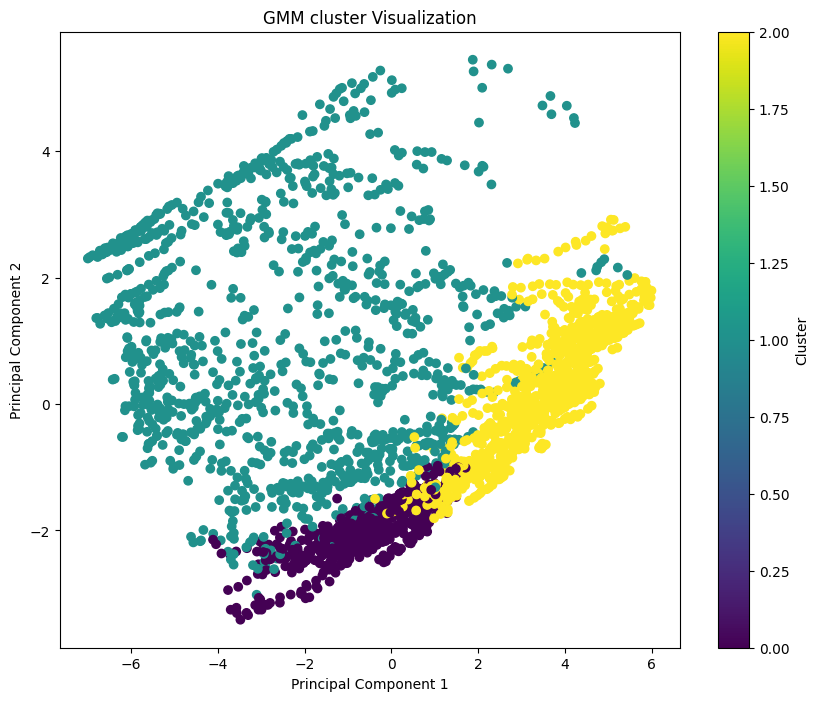

In [36]:
# vusvalizing Gmm using scatter plot
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
plt.scatter(x_pca[:, 0], x_pca[:, 1], c=gmm_labels, cmap='viridis')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('GMM cluster Visualization')
plt.colorbar(label='Cluster')
plt.show()

## Spectral Clustering(Graph based)

In [37]:
# performing Spectral Clustering
from sklearn.cluster import SpectralClustering
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score

spec = SpectralClustering(n_clusters=3, affinity='nearest_neighbors')
spec_labels = spec.fit_predict(x_pca)
df['spec_cluster'] = spec_labels

# silhouette score
silhouette = silhouette_score(x_pca, spec_labels)
print(f"Silhouette Score: {silhouette}")

# calinski harabasz score
ch_score = calinski_harabasz_score(x_pca, spec_labels)
print(f"Calinski-Harabasz Index: {ch_score}")

#davies bouldin
db_score = davies_bouldin_score(x_pca, spec_labels)
print(f"Davies-Bouldin Index: {db_score}")

/usr/local/lib/python3.12/dist-packages/sklearn/manifold/_spectral_embedding.py:329: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


Silhouette Score: -0.1924421839705845
Calinski-Harabasz Index: 27.6788055220939
Davies-Bouldin Index: 1.8051562494052302


In [38]:
# summarizing the spectral clustering labels
spec_summary = df.groupby('spec_cluster').mean(numeric_only = True)
display(spec_summary)

,Birth Rate,CO2 Emissions,Days to Start Business,Energy Usage,GDP,Health Exp % GDP,Health Exp/Capita,Infant Mortality Rate,Internet Usage,Lending Interest,...,Population 15-64,Population 65+,Population Total,Population Urban,Tourism Inbound,Tourism Outbound,kmeans_cluster,dbscan_cluster,agg_cluster,GMM_cluster
spec_cluster,,,,,,,,,,,,,,,,,,,,,
0,0.022670,28222.202885,28.250577,18425.286923,6.163495e+10,0.062826,401.948269,0.031423,0.228346,0.125601,...,0.624715,0.072539,1.408581e+07,0.550929,1.877353e+09,1.225811e+09,6.788462,-1.000000,3.572308,1.116154
1,0.040846,1836.461538,21.000000,14338.000000,1.976028e+09,0.118000,57.307692,0.107500,0.000000,0.219769,...,0.550077,0.024846,5.165826e+06,0.371615,3.530769e+07,2.861538e+07,11.000000,-1.000000,8.000000,2.000000
2,0.017857,4613.439560,26.000000,14338.000000,1.214307e+10,0.061000,193.000000,0.020000,0.334066,0.120000,...,0.642923,0.053934,6.425977e+04,0.932978,6.058901e+08,3.731538e+08,5.868132,-0.714286,0.000000,0.000000


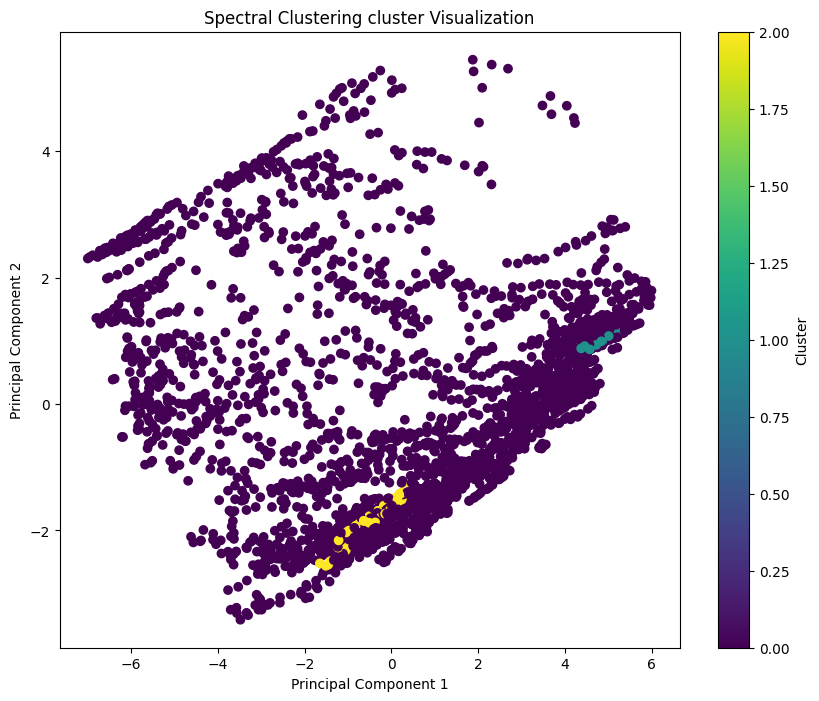

In [39]:
# vusuvalizing the garph model of spectral clustering using scatter plot
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
plt.scatter(x_pca[:, 0], x_pca[:, 1], c=spec_labels, cmap='viridis')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Spectral Clustering cluster Visualization')
plt.colorbar(label='Cluster')
plt.show()

## Comparing the 3 Clusters

In [40]:
# Comparing the kmeans,DBSCAN and Agglomerative clusters validation
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Create a dictionary to store validation scores for each method
validation_scores = {
    'KMeans': {
        'Silhouette Score': silhouette_score(x_pca, kmeans_labels),
        'Calinski-Harabasz Index': calinski_harabasz_score(x_pca, kmeans_labels),
        'Davies-Bouldin Index': davies_bouldin_score(x_pca, kmeans_labels)
    },
    'DBSCAN': {
        'Silhouette Score': silhouette_score(x_pca_filtered, dbscan_labels_filtered),
        'Calinski-Harabasz Index': calinski_harabasz_score(x_pca_filtered, dbscan_labels_filtered),
        'Davies-Bouldin Index': davies_bouldin_score(x_pca_filtered, dbscan_labels_filtered)
    },
    'Agglomerative': {
        'Silhouette Score': silhouette_score(x_pca, agg_labels),
        'Calinski-Harabasz Index': calinski_harabasz_score(x_pca, agg_labels),
        'Davies-Bouldin Index': davies_bouldin_score(x_pca, agg_labels)
    },
    'Gaussian_Mixture' : {
        'Silhouette Score': silhouette_score(x_pca, gmm_labels),
        'Calinski-Harabasz Index': calinski_harabasz_score(x_pca, gmm_labels),
        'Davies-Bouldin Index': davies_bouldin_score(x_pca, gmm_labels)
    },
    'Spectral_Clustering' : {
        'Silhouette Score': silhouette_score(x_pca, spec_labels),
        'Calinski-Harabasz Index': calinski_harabasz_score(x_pca, spec_labels),
        'Davies-Bouldin Index': davies_bouldin_score(x_pca, spec_labels)
    }
}

# Convert the dictionary to a pandas DataFrame for easy display
validation_df = pd.DataFrame(validation_scores)

# Display the DataFrame
display(validation_df)

,KMeans,DBSCAN,Agglomerative,Gaussian_Mixture,Spectral_Clustering
Silhouette Score,0.142902,-0.099766,0.134307,0.182400,-0.192442
Calinski-Harabasz Index,513.074421,85.076431,619.985064,903.763503,27.678806
Davies-Bouldin Index,1.819552,1.182606,2.019024,1.669067,1.805156


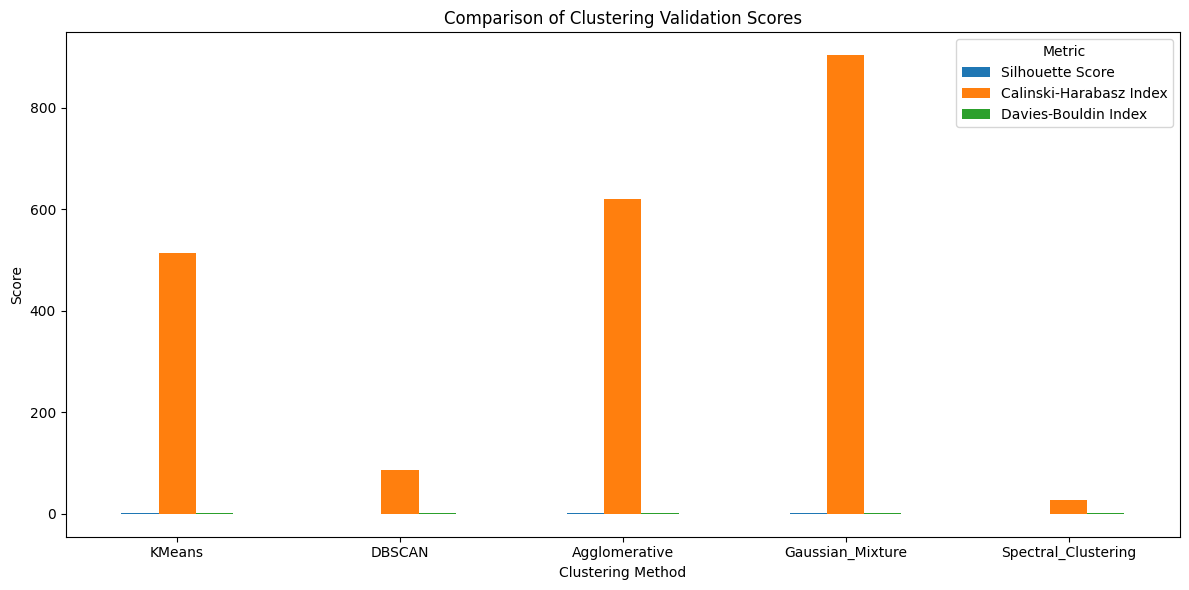

In [41]:
## compring the kmeans DBSCAN and Agglomerative cluster using visuvalization
# Transpose the validation_df for easier plotting
validation_df_T = validation_df.T

# Create a bar plot
plt.figure(figsize=(12, 6))
validation_df_T.plot(kind='bar', ax=plt.gca())
plt.title('Comparison of Clustering Validation Scores')
plt.xlabel('Clustering Method')
plt.ylabel('Score')
plt.xticks(rotation=0)
plt.legend(title='Metric')
plt.tight_layout()
plt.show()

We have performed five clustering models — KMeans, DBSCAN, Agglomerative Clustering, Gaussian Mixture Model (GMM), and Spectral Clustering. For each model, we observed three performance scores: Silhouette Score, Calinski–Harabasz Index, and Davies–Bouldin Index. Based on the comparison of these metrics, we found that the Gaussian Mixture Model (GMM) achieved the best performance among all five models.

In [42]:
# final clustered data
df.to_csv("clustered_data.csv", index = False)

In [43]:
# loading the final clustered data
df_clustered = pd.read_csv("clustered_data.csv")
df_clustered.head()

,Birth Rate,CO2 Emissions,Country,Days to Start Business,Energy Usage,GDP,Health Exp % GDP,Health Exp/Capita,Infant Mortality Rate,Internet Usage,...,Population 65+,Population Total,Population Urban,Tourism Inbound,Tourism Outbound,kmeans_cluster,dbscan_cluster,agg_cluster,GMM_cluster,spec_cluster
0,0.020,87931.0,Algeria,26.0,26998.0,5.479006e+10,0.035,60.0,0.0340,0.0,...,0.039,31719449.0,0.599,102000000.0,193000000.0,10,-1,5,1,0
1,0.050,9542.0,Angola,26.0,7499.0,9.129595e+09,0.034,22.0,0.1075,0.0,...,0.025,13924930.0,0.324,34000000.0,146000000.0,11,-1,8,2,0
2,0.043,1617.0,Benin,26.0,1983.0,2.359122e+09,0.043,15.0,0.0900,0.0,...,0.029,6949366.0,0.383,77000000.0,50000000.0,7,-1,2,2,0
3,0.027,4276.0,Botswana,26.0,1836.0,5.788312e+09,0.047,152.0,0.0540,0.0,...,0.029,1755375.0,0.532,227000000.0,209000000.0,2,-1,2,2,0
4,0.046,1041.0,Burkina Faso,26.0,14338.0,2.610959e+09,0.051,12.0,0.0960,0.0,...,0.028,11607944.0,0.178,23000000.0,30000000.0,11,-1,8,2,0


# Deployement

In [47]:
# save the best model
from joblib import dump

# Save the objects
dump(scaler, 'scaler.joblib')   # to scale new inputs
dump(pca, 'pca.joblib')         # to transform scaled inputs
dump(gmm, 'gaussian_mixture_model.joblib')     # trained clustering model

['gaussian_mixture_model.joblib']